<a href="https://colab.research.google.com/github/leehg9805/S-W-/blob/main/%EB%8B%A4%EC%9D%B4%EC%95%84%EB%AA%AC%EB%93%9C_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [5]:
!kaggle datasets download -d nancyalaswad90/diamonds-prices

  0% 0.00/711k [00:00<?, ?B/s]
100% 711k/711k [00:00<00:00, 110MB/s]


In [6]:
!unzip '*.zip'

Archive:  diamonds-prices.zip
  inflating: Diamonds Prices2022.csv  


# **다이아몬드 가격 예측**

1. Index: 다이아 몬드 번호  
2. carat : 다이아 몬드 carat 표시
3. cut : 어떻게 잘랐는지
4. color: 다이몬드 색
5. clarity: 다이아몬드의 물체 형태
6. depth: 다이아몬드 깊이
7. table: 테이블
8. price: 가격
9. x, y, z: 의미 불명










In [7]:
df = pd.read_csv('/content/Diamonds Prices2022.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [14]:
# Nan값의 개수 알아보기
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [15]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [17]:
# 예측 분석에 필요 없는 Unnamed: 0, table, x, y, z를 삭제 하여 줍니다.

df.drop(df[['Unnamed: 0', 'table', 'x','y', 'z' ]],axis=1, inplace=True)

In [18]:
df.head()

,carat,cut,color,clarity,depth,price
0,0.23,Ideal,E,SI2,61.5,326
1,0.21,Premium,E,SI1,59.8,326
2,0.23,Good,E,VS1,56.9,327
3,0.29,Premium,I,VS2,62.4,334
4,0.31,Good,J,SI2,63.3,335


In [19]:
# 수치형 데이터 중 price의 표준편차를 통해 서로간의 차이가 많이 난단느 것을 알 수 있습니다.
# 이를 통해 이상치제거 또는 스케일링을 통해 데이터를 완하 시켜야 합니다.
df.describe()

,carat,depth,price
count,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,3932.734294
std,0.473999,1.432626,3989.338447
min,0.200000,43.000000,326.000000
25%,0.400000,61.000000,950.000000
50%,0.700000,61.800000,2401.000000
75%,1.040000,62.500000,5324.000000
max,5.010000,79.000000,18823.000000


# EDA

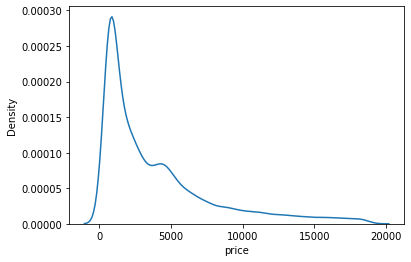

In [22]:
# 커널 밀도 추정을 통해 이상치 때문에 표준편차가 크다는 것을 알 수 있습니다.
sns.kdeplot(x=df['price'])

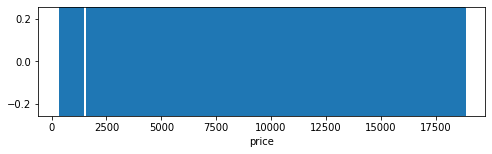

In [23]:
# 러그 플롯을 통해서는 이상치가 있는지 알기 쉽지 않음
fig = plt.figure(figsize=(8,2))
sns.rugplot(x='price', data=df, height=1)

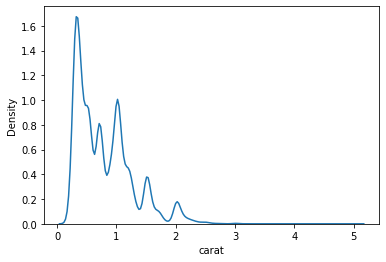

In [24]:
# 이상치를 확인을 하였기에 나중에 이상치를 제거해 줍니다.
sns.kdeplot(x=df['carat'])

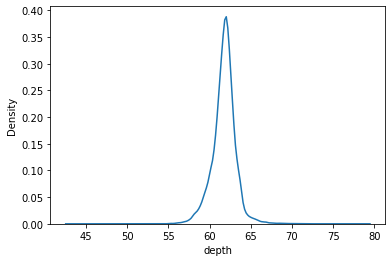

In [25]:
sns.kdeplot(x=df['depth'])

In [26]:
# 가격의 이상치 제거

p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.1)

df = df[(p1>df['price']) & (df['price']>p2)]

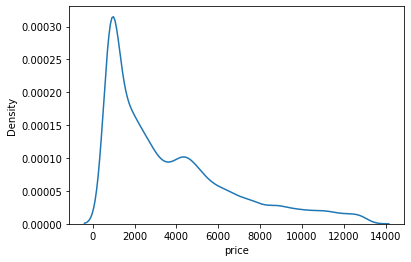

In [27]:
sns.kdeplot(x=df['price'])

In [28]:
# 카렛의 이상치 제거
c1 = df['carat'].quantile(0.95)
c2 = df['carat'].quantile(0.1)

df = df[(c1>df['carat']) & (df['carat']>c2)]

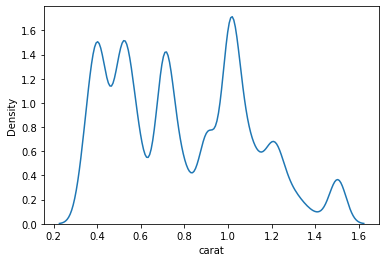

In [29]:
sns.kdeplot(x=df['carat'])

In [30]:
# 가격은 스케일링 해주어야 한다는 것을 알 수 있음
df.describe()

,carat,depth,price
count,38402.000000,38402.000000,38402.000000
mean,0.795852,61.753771,3606.018358
std,0.312609,1.484856,2599.754716
min,0.340000,43.000000,647.000000
25%,0.510000,61.000000,1549.000000
50%,0.730000,61.800000,2862.000000
75%,1.020000,62.600000,5008.000000
max,1.510000,79.000000,13096.000000


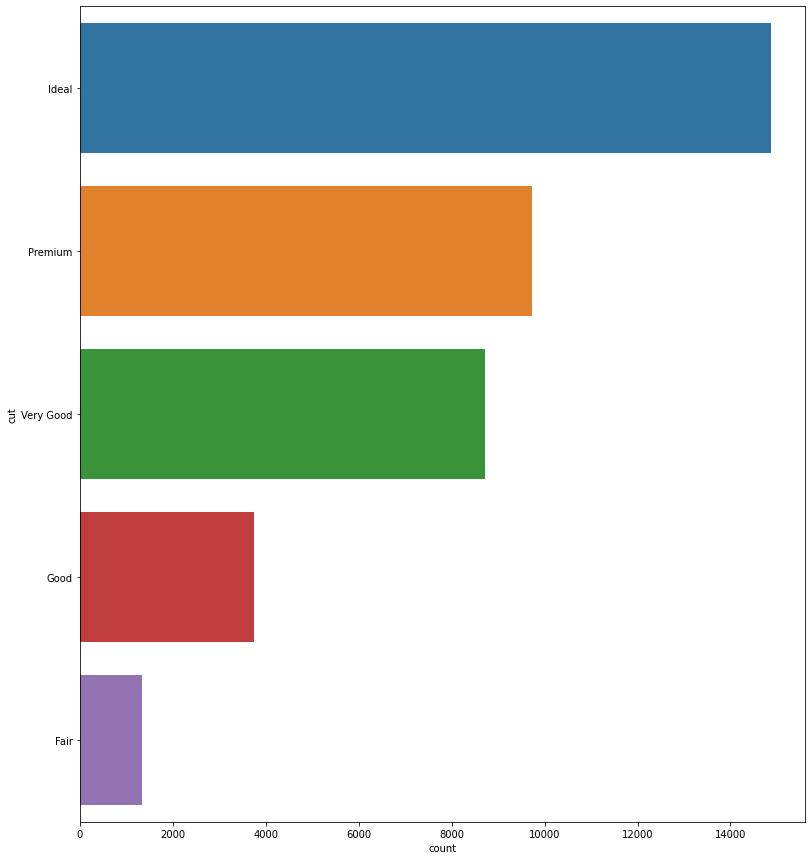

In [31]:
# countplot을 통해서 cut 상태 갯수 확인
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='cut', data=df.fillna('n/a'),
              order =df.fillna('n/a')['cut'].value_counts().index)

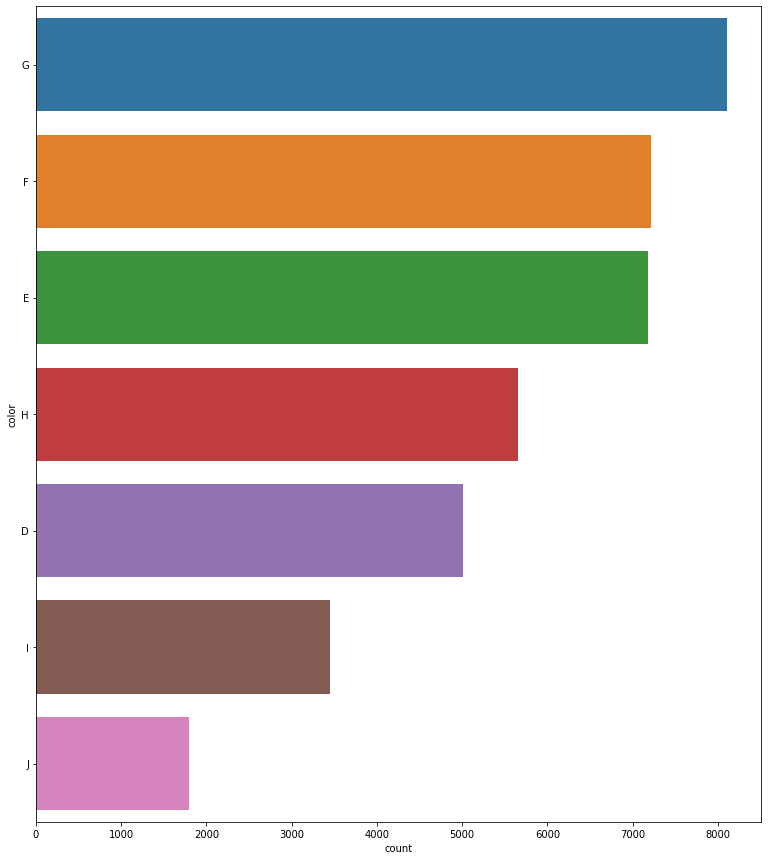

In [32]:
# countplot을 통해서 color 갯수 확인
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='color', data=df.fillna('n/a'),
              order =df.fillna('n/a')['color'].value_counts().index)

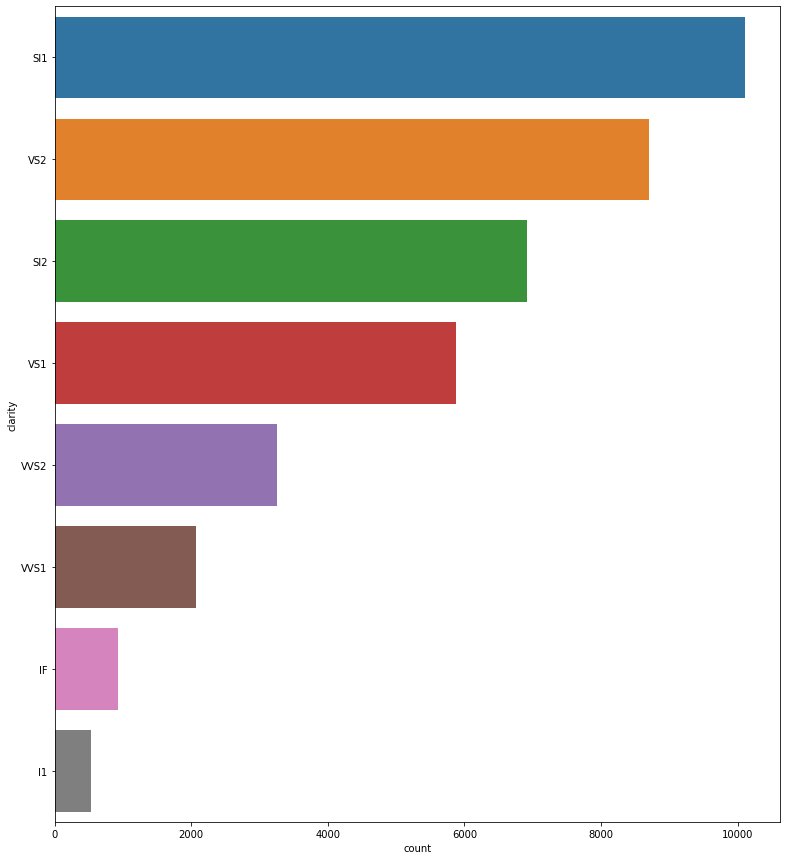

In [33]:
# countplot을 통해서 clarity 갯수 확인
# 카테고리별 확인 결과 기타로 바꿀 이유가 없기에 그대로 가기로 함             
from numpy import ma
fig = plt.figure(figsize=(13,15))
sns.countplot(y='clarity', data=df.fillna('n/a'),
              order =df.fillna('n/a')['clarity'].value_counts().index)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38402 entries, 90 to 53942
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    38402 non-null  float64
 1   cut      38402 non-null  object 
 2   color    38402 non-null  object 
 3   clarity  38402 non-null  object 
 4   depth    38402 non-null  float64
 5   price    38402 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ MB


In [35]:
df.describe()

,carat,depth,price
count,38402.000000,38402.000000,38402.000000
mean,0.795852,61.753771,3606.018358
std,0.312609,1.484856,2599.754716
min,0.340000,43.000000,647.000000
25%,0.510000,61.000000,1549.000000
50%,0.730000,61.800000,2862.000000
75%,1.020000,62.600000,5008.000000
max,1.510000,79.000000,13096.000000


In [36]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'price'], dtype='object')

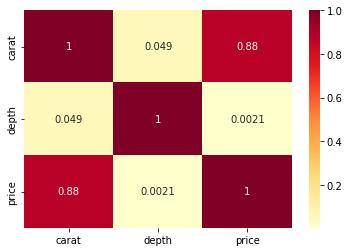

In [37]:
# 캐럿과 가격의 상관 관계가 많이 있다는 것을 알 수 있습니다.
sns.heatmap(df[['carat', 'cut', 'color', 'clarity', 'depth', 'price']].corr(),
            annot=True, cmap='YlOrRd')

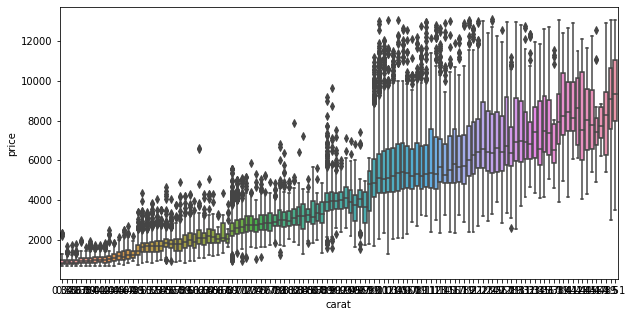

In [38]:
# 너무 많아 확인이 불가
fig = plt.figure(figsize = (10,5))
sns.boxplot(x='carat', y ='price', data=df)

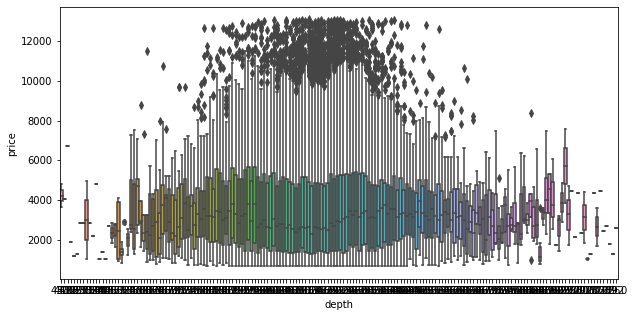

In [39]:
# 너무 많아 확인이 불가
fig = plt.figure(figsize = (10,5))
sns.boxplot(x='depth', y ='price', data=df)

# 원핫인코딩과 스케일링

In [43]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'price'], dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler

X_num = df[['price']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index= X_num.index,
                        columns=X_num.columns) # 스케일링 해주기( 기울기 극단적으로 가지 않기 위해 )

In [42]:
X_scaled.head()

,price
90,-0.326581
91,-0.326581
92,-0.326581
93,-0.325811
94,-0.325811


In [44]:
X_cat = df.drop(['price','depth','carat'], axis=1)
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
90,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
91,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
93,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [45]:
X_columns = df[['depth','carat']]

In [46]:
X_columns

,depth,carat
90,62.5,0.70
91,55.1,0.86
92,61.6,0.70
93,62.4,0.71
94,63.8,0.78
...,...,...
53938,61.0,0.86
53939,62.2,0.75
53940,60.5,0.71
53941,59.8,0.71


In [48]:
X=pd.concat([X_cat,X_columns], axis=1)

In [49]:
X.columns

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'depth',
       'carat'],
      dtype='object')

In [50]:
y= X_scaled

In [51]:
X.shape, y.shape

((38402, 22), (38402, 1))

# 테스트 데이터 나누기

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1)

# 모델학습 및 평가

In [54]:
# 선형회귀 모델 학습 및 평가
from sklearn.linear_model import LinearRegression 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

pred = lr_reg.predict(X_test)
print('MAE', mean_absolute_error(y_test, pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, pred))) # 평균제곱근오차
print('R2', r2_score(y_test, pred)) # R2 스코어

MAE 0.2230710014791685
MSE 0.09639384686995944
RMSE 0.31047358481835363
R2 0.9047813465059066


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
import warnings
import time
warnings.filterwarnings(action='ignore')

In [58]:
# 의사결정 트리
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

print('##### ',dt_reg.__class__.__name__ , ' #####')
print('MAE', mean_absolute_error(y_test, dt_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, dt_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, dt_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, dt_pred)) # R2 스코어

#####  DecisionTreeRegressor  #####
MAE 0.24250312331999774
MSE 0.15693984629065436
RMSE 0.3961563407174677
R2 0.8449734985312306


In [59]:
# 랜덤 포레스트
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs = -1)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

print('##### ',rf_reg.__class__.__name__ , ' #####')
print('MAE', mean_absolute_error(y_test, rf_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, rf_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, rf_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, rf_pred)) # R2 스코어

#####  RandomForestRegressor  #####
MAE 0.09736614107912976
MSE 0.025767070875050816
RMSE 0.16052124742553808
R2 0.9745470704523379


In [60]:
# 그래디언트 부스트
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

print('##### ',gb_reg.__class__.__name__ , ' #####')
print('MAE', mean_absolute_error(y_test, gb_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, gb_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, gb_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, gb_pred)) # R2 스코어

#####  GradientBoostingRegressor  #####
MAE 0.09652370076696899
MSE 0.024800007135092523
RMSE 0.157480180134176
R2 0.9755023441565404


In [61]:
# XGB  
xgb_reg = XGBRegressor(n_estimators=1000, n_jobs = -1)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

print('##### ',xgb_reg.__class__.__name__ , ' #####')
print('MAE', mean_absolute_error(y_test, xgb_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, xgb_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, xgb_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, xgb_pred)) # R2 스코어

[08:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
MAE 0.09737761045751106
MSE 0.025145253197802867
RMSE 0.15857254868924467
R2 0.9751613071891105


In [62]:
# LGBM
lgb_reg = LGBMRegressor(n_estimators=1000, n_jobs = -1)
lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)


print('##### ',lgb_reg.__class__.__name__ , ' #####')
print('MAE', mean_absolute_error(y_test, lgb_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, lgb_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, lgb_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, lgb_pred)) # R2 스코어

#####  LGBMRegressor  #####
MAE 0.09287800616489342
MSE 0.023669797139650187
RMSE 0.1538499175809015
R2 0.9766187751054656


# 평가 결과
평가 결과 LGBM모델을 사용을 하면 오차범위가 줄어들기에 
LGBM모델을 결과로 시각화를 통한 결과 확인을 하도록 함

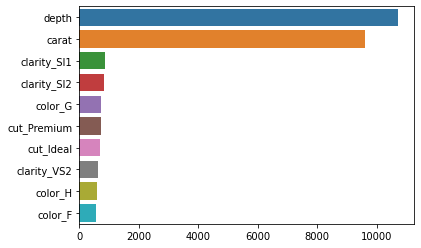

In [67]:
feature_series = pd.Series(data=lgb_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)[:10]
sns.barplot(x= feature_series, y=feature_series.index)

## 이를 통해 price에 영향을 많이 주는 것은 depth이며 그 다음은 caret으로 볼 수 있다